In [1]:
import networkx as nx
import pandas as pd
import json
import math
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# NetworkX manual calculation

In [2]:
g = nx.DiGraph()

g.add_node(1)
g.add_node(2)
g.add_node(3)
g.add_node(4)
g.add_node(5)

g.add_edge(1, 2)
g.add_edge(1, 3)
g.add_edge(2, 4)
g.add_edge(3, 4)
print "Time: 1"
print "-------"
nx.pagerank(g)

Time: 1
-------


{1: 0.1208825114224091,
 2: 0.17225727572210184,
 3: 0.17225727572210184,
 4: 0.4137204257109781,
 5: 0.1208825114224091}

In [3]:
g.add_edge(1, 5)
print "Time: 2"
print "-------"
nx.pagerank(g)

Time: 2
-------


{1: 0.1245069392297066,
 2: 0.15978412018853833,
 3: 0.15978412018853833,
 4: 0.3961407002046784,
 5: 0.15978412018853833}

In [4]:
g.add_edge(5, 4)
print "Time: 3"
print "-------"
nx.pagerank(g)

Time: 3
-------


{1: 0.10961884780663406,
 2: 0.1406776118493162,
 3: 0.1406776118493162,
 4: 0.46834831664541754,
 5: 0.1406776118493162}

In [5]:
g.add_edge(1, 4)
print "Time: 4"
print "-------"
nx.pagerank(g)

Time: 4
-------


{1: 0.11183353721518355,
 2: 0.1355980435144846,
 3: 0.1355980435144846,
 4: 0.4813723322413629,
 5: 0.1355980435144846}

# GraphSlices

In [6]:
%%bash
./EvolvingPRSmallNetwork.scala

Running PageRank algorithm...
Running evolving PageRank algorithm (1/(t*t))...
Running evolving PageRank algorithm (1/t)...


In [7]:
raw_data = [json.loads(row) for row in open("./data/evolving_pr_small.jsonline")]
index = map(lambda row: row["id"], raw_data)

## Static PR

In [8]:
static_pr_df = pd.DataFrame(map(lambda row: dict(row["pr"]), raw_data), index=index).sort_index()

In [9]:
static_pr_df.sum() # in all time windows it should be equal to 1.0

1    1.0
2    1.0
3    1.0
4    1.0
dtype: float64

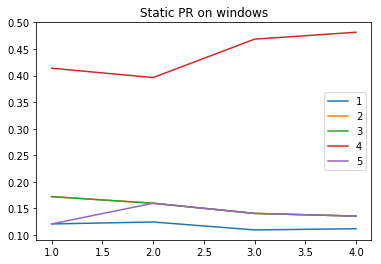

In [10]:
static_pr_df.T.plot(title="Static PR on windows")

## Evolving PR 1/(t*t)

In [11]:
evolving_quad_pr_df = pd.DataFrame(map(lambda row: dict(row["prEvolvingQuad"]), raw_data), index=index).sort_index()

In [12]:
evolving_quad_pr_df.sum() # in all time windows it should be equal to 1.0

1    1.0
2    1.0
3    1.0
4    1.0
dtype: float64

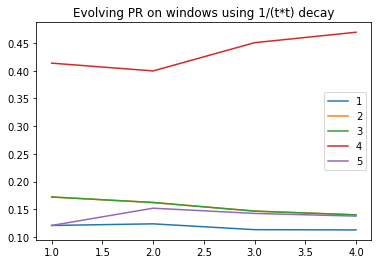

In [13]:
evolving_quad_pr_df.T.plot(title="Evolving PR on windows using 1/(t*t) decay")

## Evolving PR 1/t

In [14]:
evolving_pr_df = pd.DataFrame(map(lambda row: dict(row["prEvolving"]), raw_data), index=index).sort_index()

In [15]:
evolving_pr_df.sum() # in all time windows it should be equal to 1.0

1    1.0
2    1.0
3    1.0
4    1.0
dtype: float64

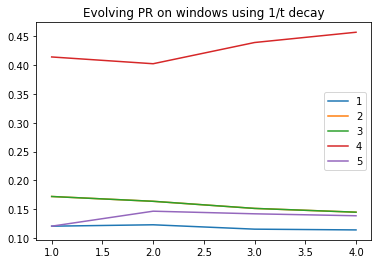

In [16]:
evolving_pr_df.T.plot(title="Evolving PR on windows using 1/t decay")